## Regresión Logística

* Crear un conjunto de datos para clasificación
* Ejemplo - ¿Equino o no?
* En un caso de regresión logísitca para predecir la probabilidad de tener un equino
* Utilizando la probabilidad para clasificar dentro de un conjunto de datos si existen equinos o no estableciendo un corte
* Visualizar los resultados del modelo entrenado y un corte en la matriz de confusión
* Visualizar los resultados del modelo entrenado y todos los cortes en una curva ROC

### Imports y preparación

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt

# establecer tamaños de fuente más grandes y el estilo
import matplotlib as mpl
font_size = 24
mpl.rcParams.update({'font.size': font_size})
mpl.rcParams['xtick.labelsize'] = font_size-5
mpl.rcParams['ytick.labelsize'] = font_size-5
plt.style.use('bmh')

%matplotlib inline

### Elaborar el dataset

In [2]:
# ¿Equinos o caninos?
#Parámetros de distribución supuestos

number_of_observations = 100 # por clase
dog_weight_mean = 80
dog_weight_stddev = 10
dog_height_mean = 20
dog_height_stddev = 10
horse_weight_mean = 100
horse_weight_stddev = 10
horse_height_mean = 42
horse_height_stddev = 10

Genrar las observaciones

In [3]:
np.random.seed(42)
dog_weights = np.random.normal(dog_weight_mean,
                               dog_weight_stddev,
                               number_of_observations)
dog_heights = np.random.normal(dog_height_mean,
                               dog_height_stddev,
                               number_of_observations)
dog_targets = [0]*number_of_observations # Canino serán 0s

horse_weights = np.random.normal(horse_weight_mean,
                                 horse_weight_stddev,
                                 number_of_observations).clip(80)
horse_heights = np.random.normal(horse_height_mean,
                                 horse_height_stddev,
                                 number_of_observations)
horse_targets = [1]*number_of_observations # Equinos serán 1s

# Combinar datasets
weights = np.hstack((dog_weights, horse_weights))
heights = np.hstack((dog_heights, horse_heights))

X = np.vstack((weights, heights)).T.clip(min=1)
y = np.hstack((dog_targets,horse_targets))

# Separar los arrays para graficar
X_horses = X[y == 1]  
y_horses = y[y == 1]

X_dogs = X[y == 0]
y_dogs = y[y == 0]

In [4]:
print("X\t\t\ty") #\t = tabulaciones
print("weight\theight\t\tclass")
for (weight, height), clss in zip(X,y):
    print("{0:0.1f}\t{1:0.1f}\t\t{2}".format(weight, height, clss))

X			y
weight	height		class
85.0	5.8		0
78.6	15.8		0
86.5	16.6		0
95.2	12.0		0
77.7	18.4		0
77.7	24.0		0
95.8	38.9		0
87.7	21.7		0
75.3	22.6		0
85.4	19.3		0
75.4	1.0		0
75.3	19.7		0
82.4	20.6		0
60.9	44.6		0
62.8	18.1		0
74.4	23.0		0
69.9	19.7		0
83.1	8.3		0
70.9	31.4		0
65.9	27.5		0
94.7	27.9		0
77.7	10.9		0
80.7	34.0		0
65.8	6.0		0
74.6	25.9		0
81.1	41.9		0
68.5	10.1		0
83.8	14.3		0
74.0	21.0		0
77.1	15.0		0
74.0	4.5		0
98.5	20.7		0
79.9	9.4		0
69.4	24.7		0
88.2	10.8		0
67.8	35.5		0
82.1	12.2		0
60.4	16.8		0
66.7	28.1		0
82.0	7.7		0
87.4	22.3		0
81.7	33.1		0
78.8	3.9		0
77.0	21.8		0
65.2	22.6		0
72.8	27.8		0
75.4	7.6		0
90.6	6.8		0
83.4	25.2		0
62.4	23.0		0
83.2	22.5		0
76.1	23.5		0
73.2	13.2		0
86.1	22.3		0
90.3	22.9		0
89.3	12.9		0
71.6	38.7		0
76.9	24.7		0
83.3	8.1		0
89.8	26.6		0
75.2	10.3		0
78.1	27.9		0
68.9	31.6		0
68.0	11.8		0
88.1	29.6		0
93.6	24.1		0
79.3	28.2		0
90.0	39.0		0
83.6	17.5		0
73.5	12.5		0
83.6	11.1		0
95.4	11.8		0
79.6	19.2		0
95.6	23.4		0
53.8	22.8		0
88.2	28.3

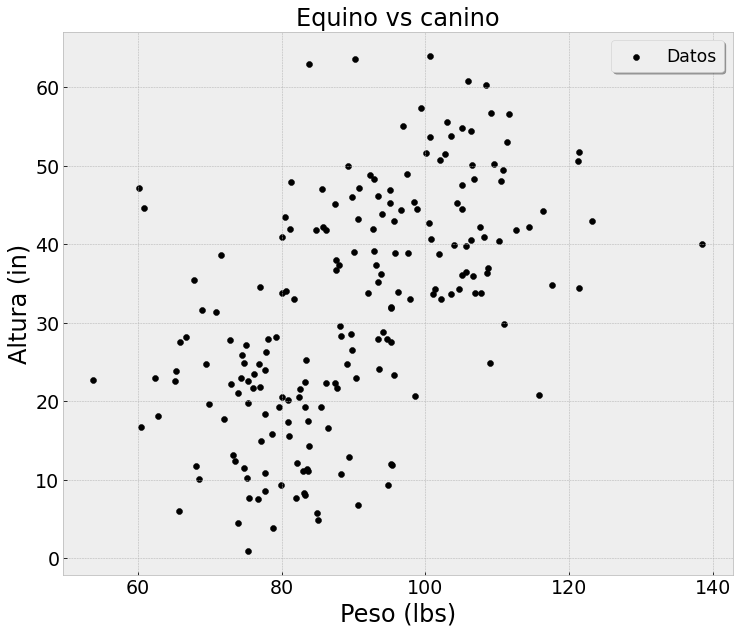

In [5]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], color='k', label='Datos')
ax.legend(shadow=True, fontsize='xx-large')
ax.set_xlabel('Peso (lbs)',fontsize=font_size)
ax.set_ylabel('Altura (in)',fontsize=font_size)
ax.set_title('Equino vs canino',fontsize=font_size)
plt.show()

### Equino como función del peso

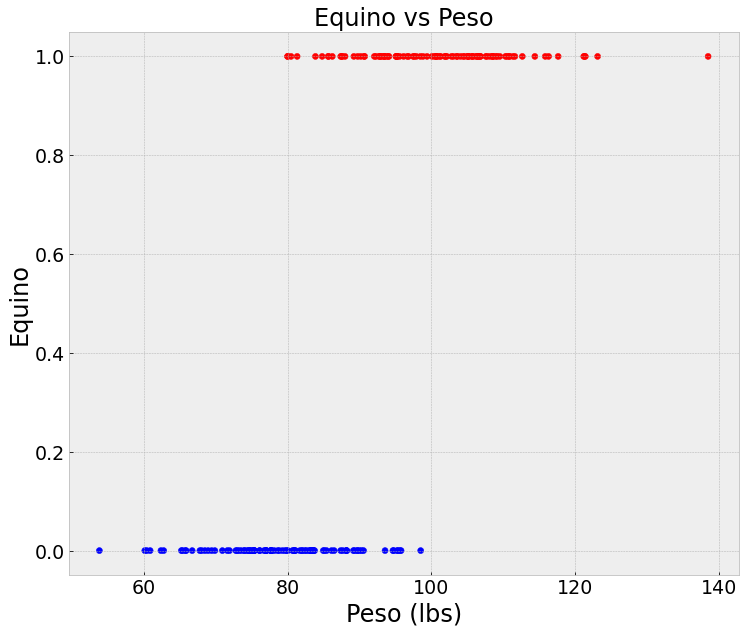

In [6]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, c=y, cmap='bwr')
ax.set_xlabel('Peso (lbs)',fontsize=font_size)
ax.set_ylabel('Equino',fontsize=font_size)
ax.set_title('Equino vs Peso',fontsize=font_size)
plt.show()

### Equino como función de la altura

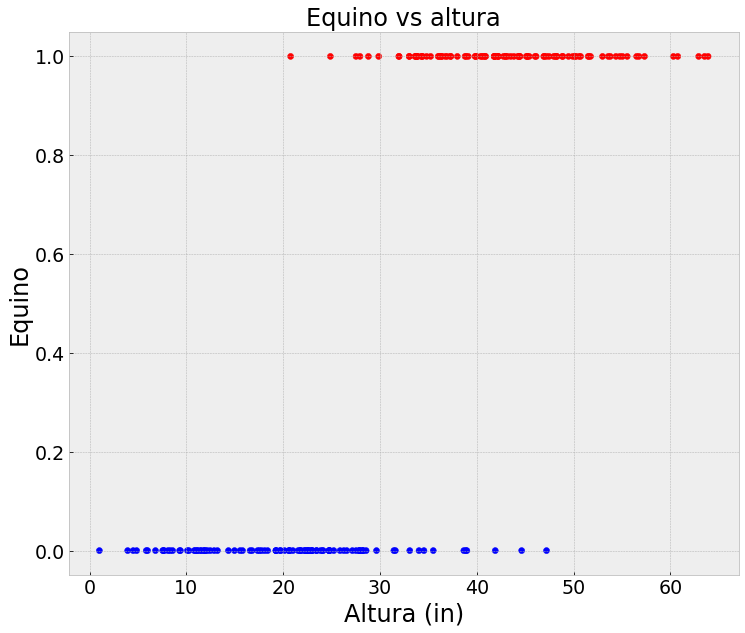

In [8]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,1], y, c=y, cmap='bwr')
ax.set_xlabel('Altura (in)',fontsize=font_size)
ax.set_ylabel('Equino',fontsize=font_size)
ax.set_title('Equino vs altura',fontsize=font_size)
plt.show()

### Equino como función del peso y la altura

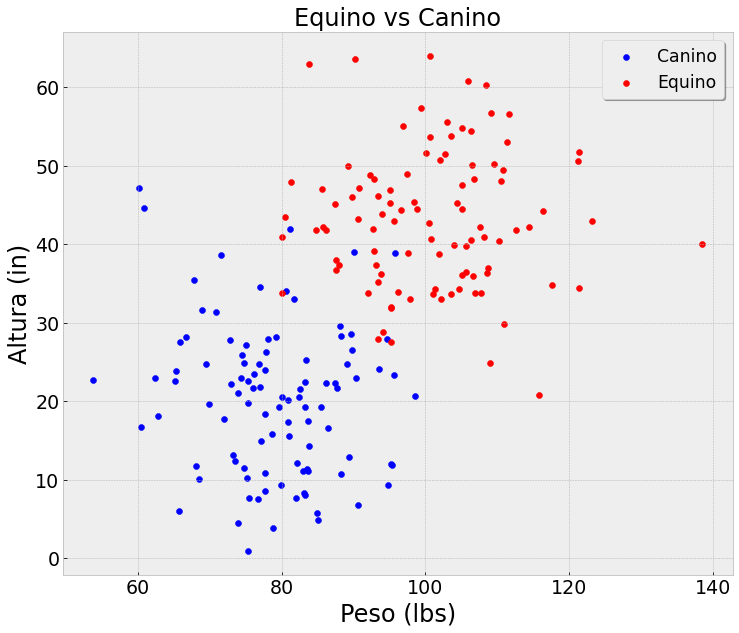

In [9]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X_dogs[:,0], X_dogs[:,1], color='b', label='Canino')
ax.scatter(X_horses[:,0], X_horses[:,1], color='r', label='Equino')
ax.legend(shadow=True, fontsize='xx-large')
ax.set_xlabel('Peso (lbs)',fontsize=font_size)
ax.set_ylabel('Altura (in)',fontsize=font_size)
ax.set_title('Equino vs Canino',fontsize=font_size)
plt.show()

## Modelo: Equino vs Peso

### Regresión Lineal

In [10]:
lin_model_w = LinearRegression()
lin_model_w.fit(X[:,:1],y) # Selección de peso vs clase

LinearRegression()

In [11]:
x_ = np.linspace(40,160,100)
line_ = lin_model_w.coef_*x_ + lin_model_w.intercept_

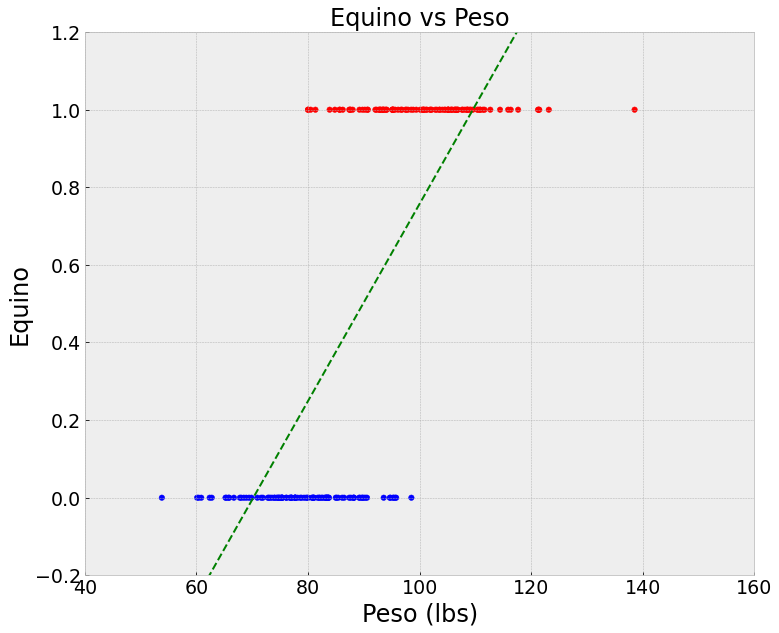

In [12]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, c=y, cmap='bwr', s=30)
ax.plot(x_, line_, 'g--')
ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Peso (lbs)',fontsize=font_size)
ax.set_ylabel('Equino',fontsize=font_size)
ax.set_title('Equino vs Peso',fontsize=font_size)
plt.show()

### Regresión Logística

In [13]:
log_model_w = LogisticRegression()
log_model_w.fit(X[:,:1],y) # selección de peso vs clase

LogisticRegression()

In [14]:
x_ = np.linspace(40,160,100).reshape(-1,1)
sigmoid = log_model_w.predict_proba(x_)[:,1] # Probabilidad de clase positiva

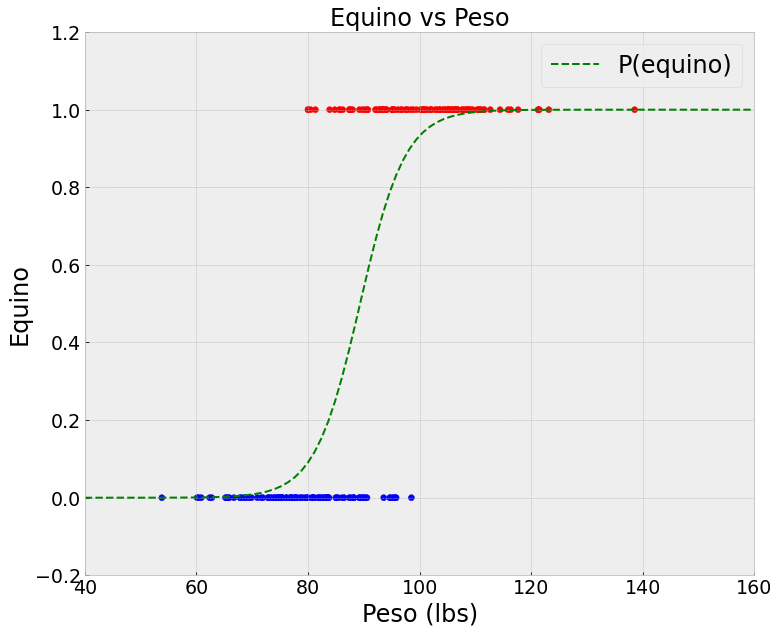

In [15]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, c=y, cmap='bwr')
ax.plot(x_, sigmoid, 'g--', label='P(equino)')
ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Peso (lbs)',fontsize=font_size)
ax.set_ylabel('Equino',fontsize=font_size)
ax.set_title('Equino vs Peso',fontsize=font_size)
ax.legend(fontsize=font_size)
plt.show()

### Para clasificar un punto como Equino o no, hay que establecer un umbral de probabilidad, que determina un punto de corte de peso

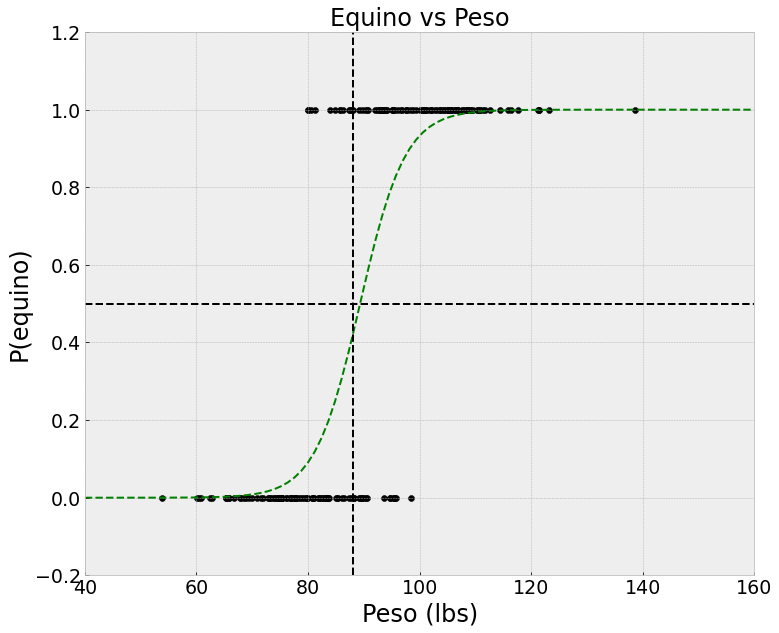

In [16]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, color='k')
ax.plot(x_, sigmoid, 'g--')
ax.axhline(0.5, color='k', linestyle='--')  # Umbral de probabilidad
ax.axvline(88, color='k', linestyle='--')  # Corte de peso en 88 lbs

ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Peso (lbs)',fontsize=font_size)
ax.set_ylabel('P(equino)',fontsize=font_size)
ax.set_title('Equino vs Peso',fontsize=font_size)
plt.show()

### Utilizar el umbral y el corte para clasificar los datos

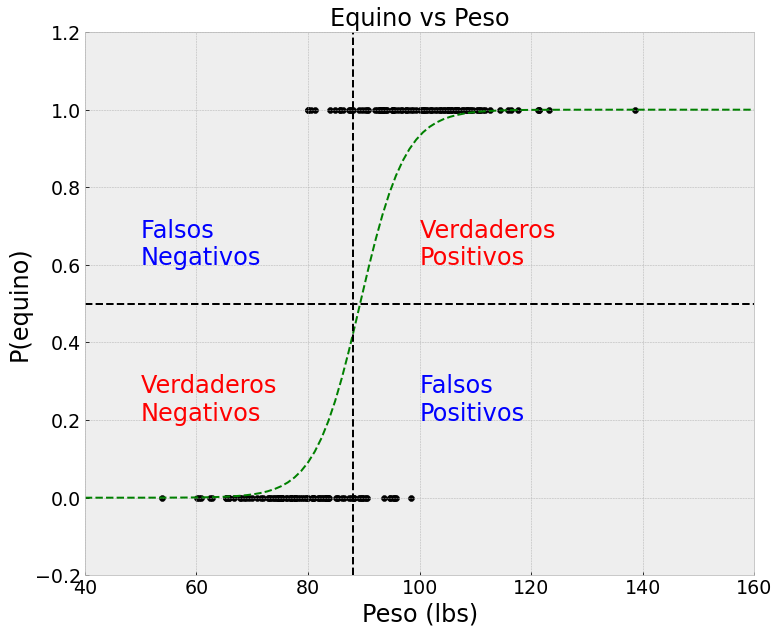

In [17]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.scatter(X[:,0], y, color='k')
ax.plot(x_, sigmoid, 'g--')
ax.axhline(0.5, color='k', linestyle='--')   
ax.axvline(88, color='k', linestyle='--')  

ax.text(50, 0.6, 'Falsos \nNegativos', size=font_size,color='blue')
ax.text(50, 0.2, 'Verdaderos \nNegativos', size=font_size,color='red')
ax.text(100, 0.6, 'Verdaderos \nPositivos', size=font_size,color='red')
ax.text(100, 0.2, 'Falsos \nPositivos', size=font_size,color='blue')

ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Peso (lbs)',fontsize=font_size)
ax.set_ylabel('P(equino)',fontsize=font_size)
ax.set_title('Equino vs Peso',fontsize=font_size)
plt.show()

## Validación

### La validación responde a las siguientes preguntas sobre ¿Que tan bueno es el modelo?

#### ¿Que tan bueno es el modelo para un umbral determinado? [Matriz de Confusión](https://en.wikipedia.org/wiki/Confusion_matrix)

#### ¿Que tan bueno es el modelo para todos los umbrales? [Curva ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

## Matriz de confusión

En la clasificación binaria, el recuento de verdaderos negativos es `C_{0,0}`, los falsos negativos es `C_{1,0}`, los verdaderos positivos es `C_{1,1}` y los falsos positivos es `C_{0,1}`.

En sklearn es:

| VN | FP |
-------------
| FN | VP |
-------------

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, ax, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Función para generar una matriz de confusión.
    """
    p = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title,fontsize=font_size)
    
    plt.colorbar(p)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión normalizada")
    else:
        print('Matriz de confusión no normalizada')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center", size = font_size,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    ax.set_ylabel('Etiqueta verdadera',fontsize=font_size)
    ax.set_xlabel('Etiqueta predicha',fontsize=font_size)

In [19]:
## Ejecute la regresión logística en todos los datos
classifier = LogisticRegression()
# tenga en cuenta el uso de .predict () a continuación, que usa el valor predeterminado 0.5 para un clasificador binario
y_pred = classifier.fit(X,y).predict(X) # agh!
y_true = y

# Calcular matriz de confusión
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print("| TN | FP |\n| FN | TP |\n")
print(cnf_matrix)

| TN | FP |
| FN | TP |

[[97  3]
 [ 2 98]]


Matriz de confusión no normalizada
[[97  3]
 [ 2 98]]


C:\Users\ellomo19\AppData\Local\Temp\ipykernel_4144\3249024944.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(p)


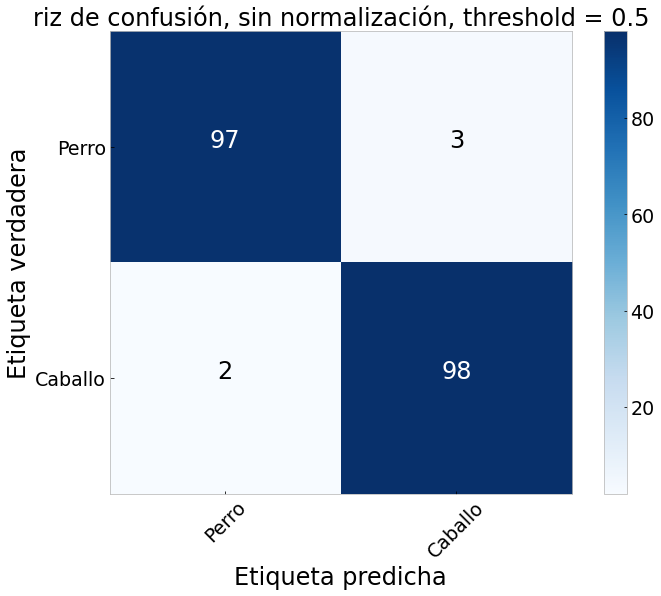

In [20]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid(False)
class_names = ["Perro","Caballo"]
plot_confusion_matrix(cnf_matrix, ax, classes=class_names,
                      title='riz de confusión, sin normalización, threshold = 0.5')

## Normalized version of confusion matrix

If there is a class inbalance (for visualization purposes) you may want to consider looking at a normalized version

Matriz de Confusión normalizada
[[0.97 0.03]
 [0.02 0.98]]


C:\Users\ellomo19\AppData\Local\Temp\ipykernel_4144\3249024944.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(p)


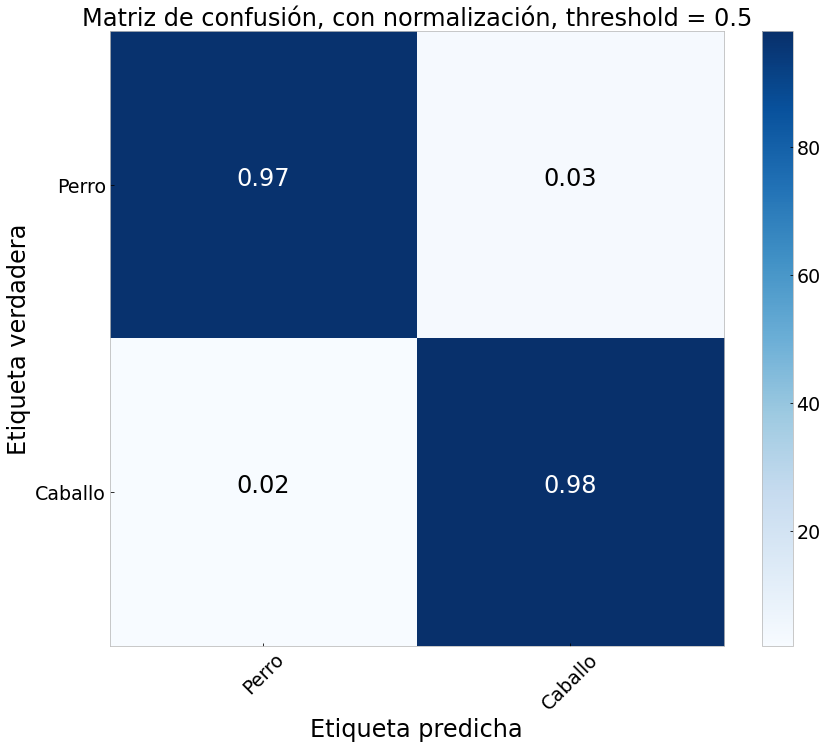

In [21]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.grid(False)
class_names = ["Perro","Caballo"]
plot_confusion_matrix(cnf_matrix, ax, classes=class_names,normalize=True,
                      title='Matriz de confusión, con normalización, threshold = 0.5')

### A partir de la matriz de confusión, puede determinar la exactitud, la precisión, la recuperación o la puntuación F1 (puede calcular el TPR y nuestro FPR). Nuestra aplicación determinará cuál de estas métricas es la medida de éxito más útil para nuestro modelo.

## Curvas ROC

¿Recuerdas cuando seleccionamos que el umbral de probabilidad fuera 0.5? Si lo deslizamos un poco, obtenemos una matriz de confusión diferente. Si apilamos estas matrices y trazamos la tasa de verdaderos positivos y las tasas de falsos positivos, entonces tenemos una curva ROC.

ROC: la característica operativa del receptor es una forma de explorar el rendimiento de un modelo variando el umbral de decisión de un clasificador.

In [22]:
## Ejecute la regresión logística en todos los datos
classifier = LogisticRegression()
# nota usando .predict_proba() a continuación, que es la probabilidad de cada clase
probs_0and1 = classifier.fit(X,y).predict_proba(X) # yes!
print("Probabilidad de no Caballo, Caballo:")
print(probs_0and1)
y_prob_H = probs_0and1[:,1]
print("\nProbaabilida de Caballo:")
print(y_prob_H)

Probabilidad de no Caballo, Caballo:
[[1.00e+00 3.19e-05]
 [1.00e+00 1.70e-04]
 [9.98e-01 1.99e-03]
 [9.95e-01 4.64e-03]
 [1.00e+00 3.20e-04]
 [9.98e-01 2.26e-03]
 [1.63e-02 9.84e-01]
 [9.84e-01 1.64e-02]
 [9.99e-01 7.07e-04]
 [9.96e-01 3.75e-03]
 [1.00e+00 4.10e-07]
 [1.00e+00 2.67e-04]
 [9.97e-01 2.59e-03]
 [9.74e-01 2.55e-02]
 [1.00e+00 4.50e-06]
 [9.99e-01 6.36e-04]
 [1.00e+00 5.65e-05]
 [1.00e+00 4.51e-05]
 [9.96e-01 4.45e-03]
 [1.00e+00 2.83e-04]
 [5.03e-01 4.97e-01]
 [1.00e+00 2.46e-05]
 [8.57e-01 1.43e-01]
 [1.00e+00 1.58e-07]
 [9.98e-01 1.79e-03]
 [2.58e-01 7.42e-01]
 [1.00e+00 1.41e-06]
 [1.00e+00 4.31e-04]
 [1.00e+00 2.84e-04]
 [1.00e+00 8.33e-05]
 [1.00e+00 9.35e-07]
 [8.08e-01 1.92e-01]
 [1.00e+00 2.61e-05]
 [1.00e+00 2.90e-04]
 [1.00e+00 4.41e-04]
 [9.92e-01 7.59e-03]
 [1.00e+00 1.28e-04]
 [1.00e+00 1.49e-06]
 [1.00e+00 4.43e-04]
 [1.00e+00 2.62e-05]
 [9.82e-01 1.82e-02]
 [8.62e-01 1.38e-01]
 [1.00e+00 2.98e-06]
 [9.99e-01 8.78e-04]
 [1.00e+00 4.28e-05]
 [9.98e-01 2.16e-0

In [23]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob_H, pos_label=1)
auc = metrics.roc_auc_score(y_true, y_prob_H) # tenga en cuenta que estamos anotando en nuestros datos de entrenamiento!

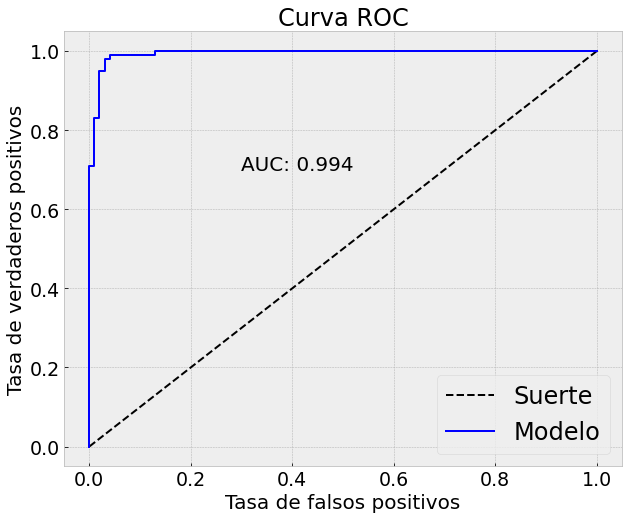

In [24]:
# Gráfica de ROC
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Suerte')
ax.plot(fpr, tpr, color='b', lw=2, label='Modelo')
ax.set_xlabel("Tasa de falsos positivos", fontsize=20)
ax.set_ylabel("Tasa de verdaderos positivos", fontsize=20)
ax.set_title("Curva ROC", fontsize=24)
ax.text(0.3, 0.7, " ".join(["AUC:",str(auc.round(3))]), fontsize=20)
ax.legend(fontsize=24);

In [26]:
import numpy as np
import pandas as pd
def roc_curve(probabilities, labels):
    '''
     ENTRADA: matriz numpy, matriz numpy
     SALIDA: lista, lista, lista
     Tome una matriz numérica de las probabilidades predichas y una matriz numérica de las
     etiquetas verdaderas.
     Devuelva las tasas de verdaderos positivos, las tasas de falsos positivos y los umbrales para el
     curva ROC.
     Ordenar instancias por su fuerza de predicción (las probabilidades)
     Para cada instancia en orden creciente de probabilidad:
     Establezca el umbral para que sea la probabilidad
     Establecer todo por encima del umbral a la clase positiva
     Calcule la tasa de verdaderos positivos (también conocida como sensibilidad o recuperación)
     Calcule la tasa de falsos positivos (1 - especificidad)
     Devolver tres listas: TPR, FPR, umbrales
     '''
    # df_prob = pd.DataFrame([probabilities, labels], columns = ['probabilities', 'labels'])
    # df_prob = pd.DataFrame()
    df_prob = pd.DataFrame({'probabilities':probabilities, 'label': labels})
    # df_prob['probabilities'] = probabilities
    # df_prob['labels'] = labels
    df_prob.sort_values('probabilities', inplace=True)
    thresh_array = []
    fpr_array = []
    tpr_array = []
    for i in df_prob['probabilities']:
        y_hat = np.zeros(len(df_prob))
        tn = 0
        tp = 0
        fp = 0
        fn = 0
        for idx2, j in enumerate(df_prob['probabilities']):
            if j >= i:
                y_hat[idx2] = 1
            else:
                y_hat[idx2] = 0
            if (df_prob['label'][idx2] == y_hat[idx2]) and (y_hat[idx2] == 0):
                tn += 1
            elif (df_prob['label'][idx2] == y_hat[idx2]) and (y_hat[idx2] == 1):
                tp += 1
            elif (df_prob['label'][idx2] != y_hat[idx2]) and (y_hat[idx2] == 1):
                fp += 1
            elif (df_prob['label'][idx2] != y_hat[idx2]) and (y_hat[idx2] == 0):
                fn += 1
        thresh_array.append(i)
#         print(f"TN {tn}, TP{tp}, FP{fp}, FN{fn}", (fp)/(tn + fp))
        # print(tn + tp + fp + fn, )
        # print((fp)/(tn + fp))
        # print((tp)/(tp + fn))
        fpr_array.append((fp)/(tn + fp))
        tpr_array.append((tp)/(tp + fn))
    return (tpr_array, fpr_array, thresh_array)
    #Podría funcionar
    # actual_p = np.sum(df_prob['labels'])
    # actual_n = len(df_prob['labels'])-tp
    # fp = np.sum(y_hat)-tp
    # fn = len(y_hat)-tn

In [27]:
tpr_array, fpr_array, thresh_array = roc_curve(y_prob_H, y_true)

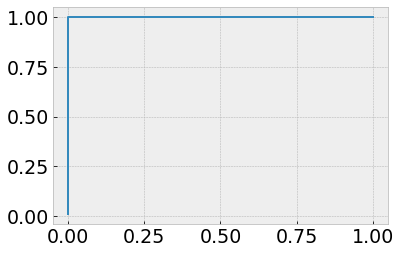

In [28]:
plt.plot(fpr_array, tpr_array)